# Introduction

In [ ]:
"""
What? k-Nearest Neighbours for regression

https://github.com/amueller/introduction_to_ml_with_python
Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly 
                  Media, 2016.
"""

# Import modules

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import euclidean_distances
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
rcParams['figure.figsize'] = 12, 6
rcParams['font.size'] = 15

# Create dataset

In [19]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

In [20]:
X, y = make_wave(n_samples=40)

# KNN for regression

In [21]:
def plot_knn_regression(n_neighbors=1): 
    
    # Let manually create some test samples
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10, 6))

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test, -3 * np.ones(len(X_test)), '*', c=cm3(2),
                     markersize=20)
    
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, -3.1, 3.1, linestyle="--")
    plt.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    plt.ylim(-3.1, 3.1)
    plt.xlabel("Feature")
    plt.ylabel("Target")

In [ ]:
"""
Again, let’s start by using the single nearest neighbor, this time using the wave dataset. We’ve added three test 
data points as green stars on the x-axis. The prediction using a single neighbor is just the target value of the 
nearest neighbor. These are shown as blue stars
"""

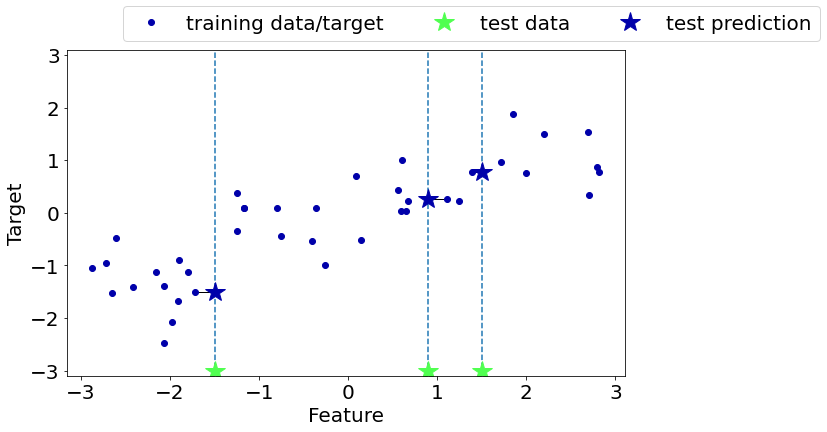

In [14]:
plot_knn_regression(n_neighbors=1)

In [ ]:
"""
Again, we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, 
the prediction is the average, or mean, of the relevant neighbors 
"""

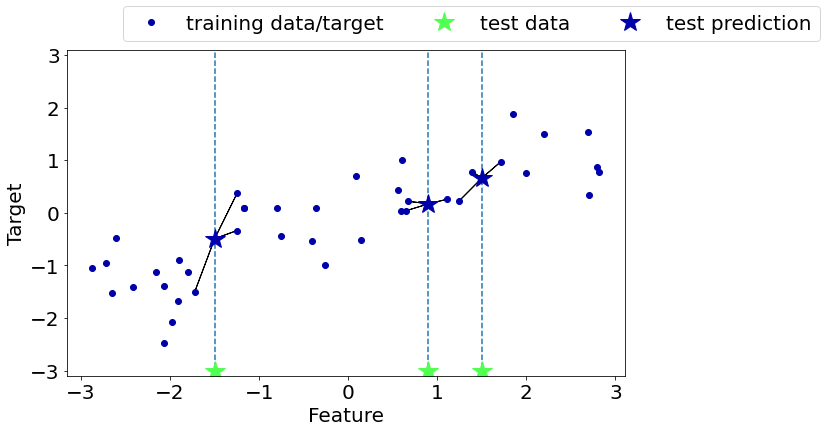

In [16]:
plot_knn_regression(n_neighbors=3)

# Applying KNN

In [24]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


In [ ]:
"""
We can also evaluate the model using the score method, which for regressors returns the R2 score. The R2 score, also 
known as the coefficient of determination, is a meas‐ ure of goodness of a prediction for a regression model, and 
yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a 
constant model that just predicts the mean of the training set responses, y_train.
"""

# Analyzing KNeighborsRegressor

In [37]:
# create 1,000 data points, evenly spaced between -3 and 3 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

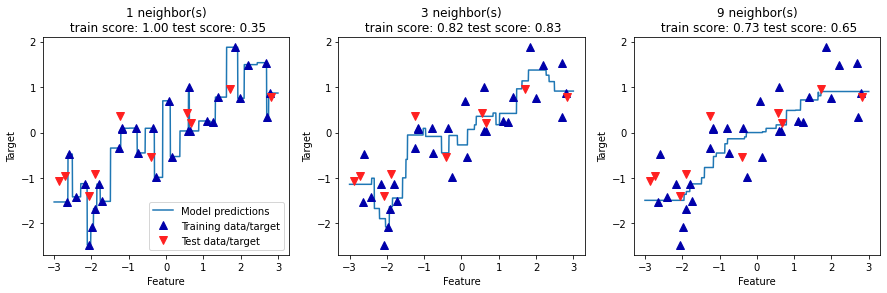

In [42]:
rcParams['font.size'] = 10
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
cm2 = ListedColormap(['#0000aa', '#ff2020'])
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
    "Test data/target"], loc="best")